Hull Tactical Market Prediction - 修复版：去除未来函数

[Part 1] 数据加载与预处理
--------------------------------------------------------------------------------
原始训练集形状: (9021, 98)
清洗后训练集形状: (6315, 98)
Date ID 范围: 2706 ~ 9020

特征数量: 94
目标变量: market_forward_excess_returns

缺失值处理:
  - 处理前缺失值总数: 25,534
  - 删除缺失率>50%的特征: 2个
  - 处理后缺失值总数: 0

[Part 2] 修复特征工程（去除未来函数）
--------------------------------------------------------------------------------
开始安全特征工程...
  - 开始安全特征工程...
  - 创建安全滞后特征...
  - 创建安全滚动特征...
  - 创建横截面特征...
  - 创建技术比率特征...
  - 创建趋势特征...

安全特征工程后特征数量: 162
处理特征工程产生的缺失值...
特征工程后缺失值总数: 37900


[I 2025-11-21 05:06:24,238] A new study created in memory with name: no-name-dcaaf5dc-9eb5-4e44-899a-e0c97ae1825f


删除NaN后数据量: 6315

安全特征类型统计:
  其他特征: 59个
  原始特征: 44个
  滞后特征: 4个
  滚动特征: 39个
  比率特征: 4个
  趋势特征: 12个

[Part 4] 超参数优化模块
--------------------------------------------------------------------------------
执行超参数优化...
开始基于比赛指标的超参数优化 (20 次试验)...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-11-21 05:06:34,370] Trial 0 finished with value: 0.2517266815667598 and parameters: {'n_estimators': 425, 'max_depth': 8, 'learning_rate': 0.2329984854528513, 'subsample': 0.8496646210492591, 'colsample_bytree': 0.7390046601106091, 'min_child_weight': 1}. Best is trial 0 with value: 0.2517266815667598.
[I 2025-11-21 05:06:41,364] Trial 1 finished with value: 0.20826895649352412 and parameters: {'n_estimators': 234, 'max_depth': 8, 'learning_rate': 0.20027875293580222, 'subsample': 0.8770181444490113, 'colsample_bytree': 0.7051461235739506, 'min_child_weight': 6}. Best is trial 0 with value: 0.2517266815667598.
[I 2025-11-21 05:06:48,521] Trial 2 finished with value: 0.41889831682299583 and parameters: {'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.09545624180177516, 'subsample': 0.7458511274633584, 'colsample_bytree': 0.7760605607398844, 'min_child_weight': 4}. Best is trial 2 with value: 0.41889831682299583.
[I 2025-11-21 05:06:53,346] Trial 3 finished with value: 0.

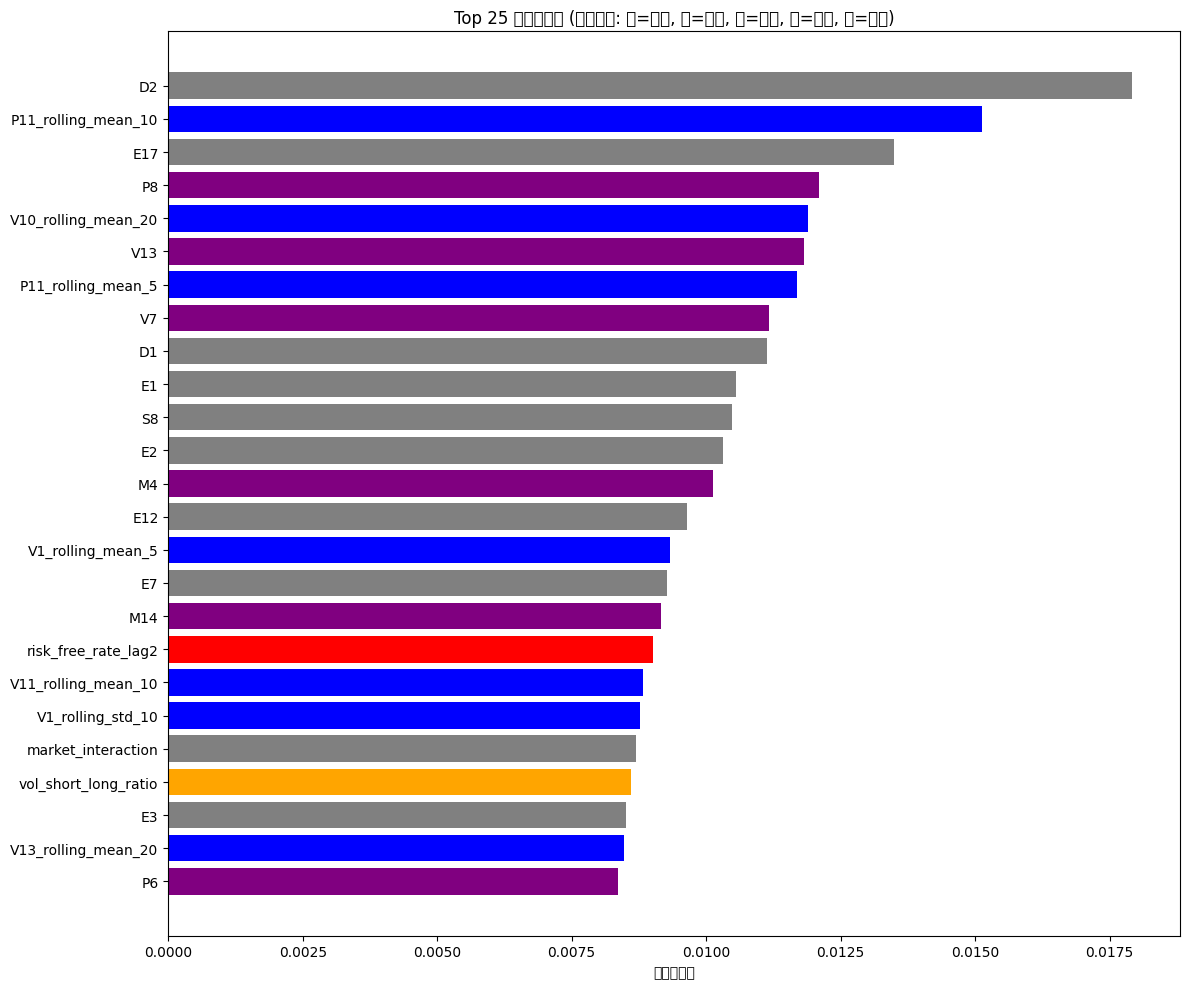


第二阶段: 基于比赛评价指标优化...
  开始优化缩放因子...
    尝试缩放因子 0.500: 分数 = 5.934277
    尝试缩放因子 1.000: 分数 = 7.629676
    尝试缩放因子 1.500: 分数 = 8.404598
    尝试缩放因子 2.400: 分数 = 9.032062
  ✓ 最优缩放因子: 3.0000
  ✓ 最优分数: 9.235992


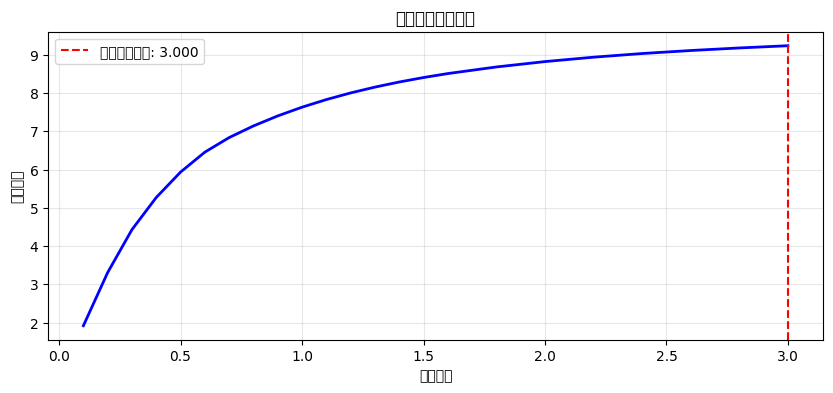


✓ 两阶段优化完成
  目标标准差: 0.011012
  最优缩放因子: 3.0000
  优化后分数: 9.235992
  优化前分数: 7.629676
  分数提升: 1.606316

[Part 6] 模型验证和诊断
--------------------------------------------------------------------------------


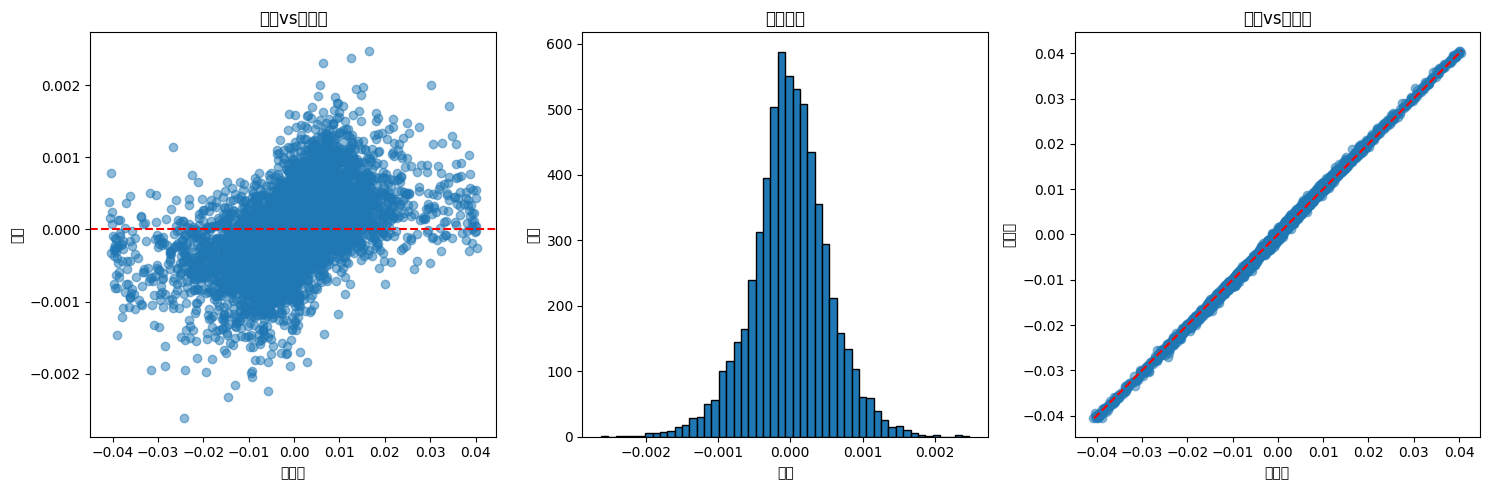

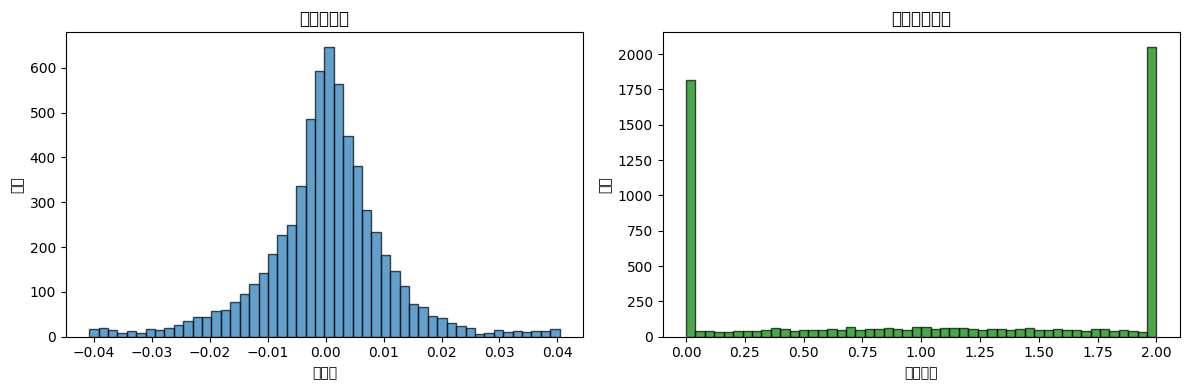


[Part 7] 准备API预测功能（修复版：去除未来函数）
--------------------------------------------------------------------------------
✓ 修复后的预测函数已定义（无未来函数）

[Part 8] 启动Kaggle推理服务器
--------------------------------------------------------------------------------
测试模式：运行本地网关
已预测 10 个样本, 最新权重: 0.0000

✓ 修复版Pipeline完成（已去除所有未来函数）

📊 模型信息:
  模型: XGBoost + 安全特征工程 + Optuna优化
  训练数据量: 6315
  特征数量: 162
  特征类型: {'其他特征': 59, '原始特征': 44, '滞后特征': 4, '滚动特征': 39, '比率特征': 4, '趋势特征': 12}
  训练集MSE: 0.00000028
  训练集R²: 0.9977
  最优缩放因子: 3.0000
  优化后分数: 9.235992

🔧 优化参数:
  n_estimators: 744
  max_depth: 5
  learning_rate: 0.26023972553391206
  subsample: 0.9143477825023372
  colsample_bytree: 0.8146935001649451
  min_child_weight: 4

🎯 安全特征类型:
  其他特征: 59个特征
  原始特征: 44个特征
  滞后特征: 4个特征
  滚动特征: 39个特征
  比率特征: 4个特征
  趋势特征: 12个特征

✅ 修复内容总结:
  ✓ 移除了所有使用forward_returns构建的特征
  ✓ 滚动特征添加了shift(1)避免未来信息
  ✓ 只使用历史数据进行特征构建
  ✓ 测试特征创建函数完全避免使用目标变量

🚀 提交步骤:
  1. 点击 'Save Version'
  2. 选择 'Save & Run All (Commit)'
  3. 等待运行完成
  4. 在Submissions页面提交

In [13]:
"""
Hull Tactical Market Prediction - 完整Pipeline + API提交 + 超参数优化
修复版：去除所有未来函数，防止数据泄露
"""

import os
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

# Kaggle评估API
import kaggle_evaluation.default_inference_server as kies

# 超参数优化库
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import optuna
from optuna.samplers import TPESampler

# 设置随机种子
np.random.seed(42)

print("="*80)
print("Hull Tactical Market Prediction - 修复版：去除未来函数")
print("="*80)

# ============================================================================
# Part 1: 数据加载与预处理
# ============================================================================

print("\n[Part 1] 数据加载与预处理")
print("-"*80)

DATA_PATH = Path('/kaggle/input/hull-tactical-market-prediction/')

# 加载数据
train = pd.read_csv(DATA_PATH / 'train.csv')
print(f"原始训练集形状: {train.shape}")

# 使用后70%的数据（缺失率较低）
cutoff_idx = int(len(train) * 0.3)
train_clean = train.iloc[cutoff_idx:].copy()
print(f"清洗后训练集形状: {train_clean.shape}")
print(f"Date ID 范围: {train_clean['date_id'].min()} ~ {train_clean['date_id'].max()}")

# 识别特征类型
feature_cols = [col for col in train_clean.columns 
                if col not in ['date_id', 'forward_returns', 'risk_free_rate', 
                               'market_forward_excess_returns']]

target_col = 'market_forward_excess_returns'

print(f"\n特征数量: {len(feature_cols)}")
print(f"目标变量: {target_col}")

# 缺失值处理
print("\n缺失值处理:")
missing_before = train_clean[feature_cols].isnull().sum().sum()
print(f"  - 处理前缺失值总数: {missing_before:,}")

# 删除缺失率>50%的特征
missing_rates = train_clean[feature_cols].isnull().mean()
high_missing_cols = missing_rates[missing_rates > 0.5].index.tolist()
print(f"  - 删除缺失率>50%的特征: {len(high_missing_cols)}个")

feature_cols = [col for col in feature_cols if col not in high_missing_cols]

# 前向填充 + 中位数填充
train_clean[feature_cols] = train_clean[feature_cols].fillna(method='ffill').fillna(
    train_clean[feature_cols].median()
)

missing_after = train_clean[feature_cols].isnull().sum().sum()
print(f"  - 处理后缺失值总数: {missing_after}")

# ============================================================================
# Part 2: 修复特征工程（去除未来函数）
# ============================================================================

print("\n[Part 2] 修复特征工程（去除未来函数）")
print("-"*80)

def add_safe_lag_features(df, max_lag=10):
    """
    安全的滞后特征（不使用目标变量）
    """
    print("  - 创建安全滞后特征...")
    df = df.copy()
    
    # 只对风险利率创建滞后特征（不使用forward_returns）
    for lag in [1, 2, 3, 5]:
        if 'risk_free_rate' in df.columns:
            df[f'risk_free_rate_lag{lag}'] = df['risk_free_rate'].shift(lag)
    
    return df

def add_safe_rolling_features(df, window_sizes=[5, 10, 20]):
    """
    安全的滚动特征（只使用原始特征，不涉及目标变量）
    """
    print("  - 创建安全滚动特征...")
    df = df.copy()
    
    # 对原始特征类型分别处理
    volatility_cols = [col for col in df.columns if col.startswith('V')]
    price_cols = [col for col in df.columns if col.startswith('P')]
    market_cols = [col for col in df.columns if col.startswith('M')]
    
    for window in window_sizes:
        # 波动率特征的滚动统计
        for col in volatility_cols[:5]:  # 限制数量防止维度爆炸
            df[f'{col}_rolling_mean_{window}'] = df[col].rolling(window, min_periods=1).mean().shift(1)  # 使用shift避免未来信息
            df[f'{col}_rolling_std_{window}'] = df[col].rolling(window, min_periods=1).std().shift(1)
        
        # 价格特征的滚动统计
        for col in price_cols[:3]:
            df[f'{col}_rolling_mean_{window}'] = df[col].rolling(window, min_periods=1).mean().shift(1)
    
    return df

def add_cross_sectional_features(df):
    """
    横截面特征（同类别特征间的相对比较）
    """
    print("  - 创建横截面特征...")
    df = df.copy()
    
    volatility_cols = [col for col in df.columns if col.startswith('V')]
    price_cols = [col for col in df.columns if col.startswith('P')]
    market_cols = [col for col in df.columns if col.startswith('M')]
    
    if len(volatility_cols) >= 2:
        # 波动率相对强度
        df['volatility_zscore'] = (df[volatility_cols] - df[volatility_cols].mean(axis=1).values.reshape(-1, 1)).mean(axis=1)
        df['volatility_dispersion'] = df[volatility_cols].std(axis=1)
    
    if len(price_cols) >= 2:
        # 价格相对变化
        df['price_momentum_ratio'] = df[price_cols[0]] / (df[price_cols].mean(axis=1) + 1e-8)
    
    if len(market_cols) >= 2:
        # 市场指标相对关系
        df['market_strength'] = df[market_cols].mean(axis=1)
        df['market_divergence'] = df[market_cols].std(axis=1)
    
    return df

def add_technical_ratios(df):
    """
    技术比率特征（基于原始特征的衍生）
    """
    print("  - 创建技术比率特征...")
    df = df.copy()
    
    # 寻找相关的特征组合
    volatility_cols = [col for col in df.columns if col.startswith('V')]
    price_cols = [col for col in df.columns if col.startswith('P')]
    
    if len(volatility_cols) >= 2:
        # 波动率比率
        df['vol_short_long_ratio'] = df[volatility_cols[0]] / (df[volatility_cols[-1]] + 1e-8)
    
    if len(price_cols) >= 2:
        # 价格比率
        df['price_ratio'] = df[price_cols[0]] / (df[price_cols[1]] + 1e-8)
    
    # 市场特征交互
    market_cols = [col for col in df.columns if col.startswith('M')]
    if len(market_cols) >= 2:
        df['market_interaction'] = df[market_cols[0]] * df[market_cols[1]]
    
    return df

def add_trend_features(df, window_sizes=[5, 10, 20]):
    """
    趋势特征（基于历史价格和波动率）
    """
    print("  - 创建趋势特征...")
    df = df.copy()
    
    price_cols = [col for col in df.columns if col.startswith('P')]
    volatility_cols = [col for col in df.columns if col.startswith('V')]
    
    for window in window_sizes:
        if price_cols:
            # 价格趋势（使用shift避免未来信息）
            for col in price_cols[:2]:
                df[f'{col}_trend_{window}'] = (df[col] - df[col].shift(window)) / (df[col].shift(window) + 1e-8)
        
        if volatility_cols:
            # 波动率趋势
            for col in volatility_cols[:2]:
                df[f'{col}_vol_trend_{window}'] = df[col] - df[col].shift(window)
    
    return df

def create_safe_features(df, feature_cols):
    """
    创建安全的特征工程（无未来函数）
    """
    df = df.copy()
    
    print("  - 开始安全特征工程...")
    
    # 1. 安全滞后特征
    df = add_safe_lag_features(df)
    
    # 2. 安全滚动特征
    df = add_safe_rolling_features(df)
    
    # 3. 横截面特征
    df = add_cross_sectional_features(df)
    
    # 4. 技术比率特征
    df = add_technical_ratios(df)
    
    # 5. 趋势特征
    df = add_trend_features(df)
    
    # 6. 波动率特征增强（安全的）
    volatility_cols = [col for col in feature_cols if col.startswith('V')]
    if volatility_cols:
        df['vol_mean'] = df[volatility_cols].mean(axis=1)
        df['vol_std'] = df[volatility_cols].std(axis=1)
        df['vol_range'] = df[volatility_cols].max(axis=1) - df[volatility_cols].min(axis=1)
    
    # 7. 价格特征增强（安全的）
    price_cols = [col for col in feature_cols if col.startswith('P')]
    if price_cols:
        df['price_mean'] = df[price_cols].mean(axis=1)
        df['price_volatility'] = df[price_cols].std(axis=1)
    
    return df

# 应用修复后的特征工程
print("开始安全特征工程...")
train_engineered = create_safe_features(train_clean, feature_cols)

# 更新特征列表
new_feature_cols = [col for col in train_engineered.columns 
                    if col not in ['date_id', 'forward_returns', 'risk_free_rate', 
                                   'market_forward_excess_returns']]

print(f"\n安全特征工程后特征数量: {len(new_feature_cols)}")

# 处理新增特征中的缺失值
print("处理特征工程产生的缺失值...")
missing_after_fe = train_engineered[new_feature_cols].isnull().sum().sum()
print(f"特征工程后缺失值总数: {missing_after_fe}")

# 使用中位数填充新增特征中的缺失值
train_engineered[new_feature_cols] = train_engineered[new_feature_cols].fillna(
    train_engineered[new_feature_cols].median()
)

# 删除仍然包含NaN的行
train_engineered = train_engineered.dropna()
print(f"删除NaN后数据量: {len(train_engineered)}")

# 特征重要性预分析
print("\n安全特征类型统计:")
feature_types = {}
for col in new_feature_cols:
    if 'lag' in col:
        feature_types.setdefault('滞后特征', 0)
        feature_types['滞后特征'] += 1
    elif 'rolling' in col:
        feature_types.setdefault('滚动特征', 0)
        feature_types['滚动特征'] += 1
    elif 'trend' in col:
        feature_types.setdefault('趋势特征', 0)
        feature_types['趋势特征'] += 1
    elif 'ratio' in col or 'zscore' in col:
        feature_types.setdefault('比率特征', 0)
        feature_types['比率特征'] += 1
    elif col.startswith(('M', 'P', 'V')):
        feature_types.setdefault('原始特征', 0)
        feature_types['原始特征'] += 1
    else:
        feature_types.setdefault('其他特征', 0)
        feature_types['其他特征'] += 1

for feat_type, count in feature_types.items():
    print(f"  {feat_type}: {count}个")

# ============================================================================
# Part 3: 比赛评价指标计算函数（保持不变）
# ============================================================================

def calculate_final_score(positions, risk_free_rates, forward_returns):
    """
    计算比赛最终评价指标（调整后的夏普比率）
    """
    # 计算策略收益
    strategy_returns = risk_free_rates * (1 - positions) + positions * forward_returns
    
    # 计算策略超额收益
    strategy_excess_returns = strategy_returns - risk_free_rates
    market_excess_returns = forward_returns - risk_free_rates
    
    # 计算基本指标
    strategy_excess_cumulative = (1 + strategy_excess_returns).prod()
    strategy_mean_excess_return = strategy_excess_cumulative ** (1 / len(strategy_excess_returns)) - 1
    strategy_std = strategy_returns.std()
    
    market_excess_cumulative = (1 + market_excess_returns).prod()
    market_mean_excess_return = market_excess_cumulative ** (1 / len(market_excess_returns)) - 1
    market_std = forward_returns.std()
    
    trading_days_per_yr = 252
    
    if strategy_std == 0 or market_std == 0:
        return -1000.0  # 惩罚无效策略
    
    # 计算Sharpe比率
    sharpe = strategy_mean_excess_return / strategy_std * np.sqrt(trading_days_per_yr)
    
    # 计算波动率惩罚
    strategy_volatility = strategy_std * np.sqrt(trading_days_per_yr) * 100
    market_volatility = market_std * np.sqrt(trading_days_per_yr) * 100
    
    excess_vol = max(0, strategy_volatility / market_volatility - 1.2)
    vol_penalty = 1 + excess_vol
    
    # 计算收益惩罚
    return_gap = max(0, (market_mean_excess_return - strategy_mean_excess_return) * 100 * trading_days_per_yr)
    return_penalty = 1 + (return_gap**2) / 100
    
    # 调整后的Sharpe比率
    adjusted_sharpe = sharpe / (vol_penalty * return_penalty)
    return adjusted_sharpe

def optimize_predictions(predictions, y_true, risk_free_rates, forward_returns):
    """
    优化预测以最大化比赛评价指标
    """
    y_std = y_true.std()
    best_score = -float('inf')
    best_scale = 1.0
    
    print("  开始优化缩放因子...")
    
    # 尝试不同的缩放因子
    scales_to_try = np.concatenate([
        np.linspace(0.1, 0.5, 5),      # 小尺度
        np.linspace(0.6, 1.5, 10),     # 中等尺度
        np.linspace(1.6, 3.0, 8)       # 大尺度
    ])
    
    scores = []
    for i, scale in enumerate(scales_to_try):
        # 将预测转换为仓位
        positions = 1.0 + predictions * scale / y_std
        positions = np.clip(positions, 0.0, 2.0)
        
        # 计算分数
        current_score = calculate_final_score(positions, risk_free_rates, forward_returns)
        scores.append(current_score)
        
        if current_score > best_score:
            best_score = current_score
            best_scale = scale
        
        if (i + 1) % 5 == 0:
            print(f"    尝试缩放因子 {scale:.3f}: 分数 = {current_score:.6f}")
    
    print(f"  ✓ 最优缩放因子: {best_scale:.4f}")
    print(f"  ✓ 最优分数: {best_score:.6f}")
    
    # 可视化分数曲线
    plt.figure(figsize=(10, 4))
    plt.plot(scales_to_try, scores, 'b-', linewidth=2)
    plt.axvline(x=best_scale, color='r', linestyle='--', label=f'最优缩放因子: {best_scale:.3f}')
    plt.xlabel('缩放因子')
    plt.ylabel('评价分数')
    plt.title('缩放因子优化曲线')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return best_scale, best_score

# ============================================================================
# Part 4: 超参数优化模块（保持不变）
# ============================================================================

print("\n[Part 4] 超参数优化模块")
print("-"*80)

def objective(trial):
    """基于比赛评价指标的优化目标函数"""
    # 简化参数空间，专注于重要参数
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 800),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3),
        'subsample': trial.suggest_float('subsample', 0.7, 0.95),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.95),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 6),
    }
    
    # 使用简单的训练/验证分割
    split_idx = int(len(train_engineered) * 0.8)
    X_train = train_engineered[new_feature_cols].iloc[:split_idx]
    y_train = train_engineered[target_col].iloc[:split_idx]
    X_val = train_engineered[new_feature_cols].iloc[split_idx:]
    y_val = train_engineered[target_col].iloc[split_idx:]
    
    risk_free_val = train_engineered['risk_free_rate'].iloc[split_idx:]
    forward_returns_val = train_engineered['forward_returns'].iloc[split_idx:]
    
    # 训练模型
    model = XGBRegressor(
        **param,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_val)
    y_std = y_train.std()
    
    # 使用比赛指标
    positions = 1.0 + y_pred / y_std  # 先用基础缩放
    positions = np.clip(positions, 0.0, 2.0)
    
    score = calculate_final_score(positions, risk_free_val, forward_returns_val)
    
    return score  # 现在返回正数，越大越好

def perform_hyperparameter_optimization(n_trials=20):
    """执行基于比赛指标的超参数优化"""
    print(f"开始基于比赛指标的超参数优化 ({n_trials} 次试验)...")
    
    study = optuna.create_study(
        direction='maximize',  # 现在要最大化分数
        sampler=TPESampler(seed=42)
    )
    
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    print("超参数优化完成!")
    print(f"最佳分数: {study.best_value:.6f}")  # 现在应该是正数
    print("最佳参数:")
    for key, value in study.best_params.items():
        print(f"  {key}: {value}")
    
    return study.best_params

# 执行超参数优化（根据计算资源调整试验次数）
print("执行超参数优化...")
best_params = perform_hyperparameter_optimization(n_trials=20)

# ============================================================================
# Part 5: 训练优化后的XGBoost模型 + 两阶段优化（保持不变）
# ============================================================================

print("\n[Part 5] 训练优化后的XGBoost模型 + 两阶段优化")
print("-"*80)

# 使用全部数据训练
X_full = train_engineered[new_feature_cols]
y_full = train_engineered[target_col]

# 获取相关数据用于评价指标计算
risk_free_rates_full = train_engineered['risk_free_rate']
forward_returns_full = train_engineered['forward_returns']

print(f"训练数据: {X_full.shape}")

# 第一阶段：使用最优参数训练XGBoost模型
print("第一阶段: 使用最优参数训练XGBoost模型...")

# 在最优参数基础上添加一些固定参数
final_params = best_params.copy()
final_params.update({
    'random_state': 42,
    'n_jobs': -1,
    'verbosity': 0,
    'eval_metric': 'rmse'
})

final_xgb_model = XGBRegressor(**final_params)
final_xgb_model.fit(X_full, y_full)

# 评估训练集表现
y_pred_full = final_xgb_model.predict(X_full)
train_mse = mean_squared_error(y_full, y_pred_full)
train_r2 = r2_score(y_full, y_pred_full)

print(f"✓ 优化模型训练完成")
print(f"  训练集 MSE: {train_mse:.8f}")
print(f"  训练集 R²: {train_r2:.4f}")

# 特征重要性分析
feature_importance = pd.DataFrame({
    'feature': new_feature_cols,
    'importance': final_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 20 最重要特征:")
for i, row in feature_importance.head(20).iterrows():
    feature_type = ""
    if 'lag' in row['feature']:
        feature_type = "[滞后]"
    elif 'rolling' in row['feature']:
        feature_type = "[滚动]"
    elif 'trend' in row['feature']:
        feature_type = "[趋势]"
    elif 'ratio' in row['feature'] or 'zscore' in row['feature']:
        feature_type = "[比率]"
    elif row['feature'].startswith(('M', 'P', 'V')):
        feature_type = "[原始]"
    else:
        feature_type = "[其他]"
    
    print(f"  {row['feature']:30} {feature_type:8} {row['importance']:.4f}")

# 可视化特征重要性
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(25)

# 按特征类型着色
colors = []
for feat in top_features['feature']:
    if 'lag' in feat:
        colors.append('red')  # 滞后特征
    elif 'rolling' in feat:
        colors.append('blue')  # 滚动特征
    elif 'trend' in feat:
        colors.append('green')  # 趋势特征
    elif 'ratio' in feat or 'zscore' in feat:
        colors.append('orange')  # 比率特征
    elif feat.startswith(('M', 'P', 'V')):
        colors.append('purple')  # 原始特征
    else:
        colors.append('gray')  # 其他特征

plt.barh(top_features['feature'], top_features['importance'], color=colors)
plt.xlabel('特征重要性')
plt.title('Top 25 特征重要性 (颜色编码: 红=滞后, 蓝=滚动, 绿=趋势, 橙=比率, 紫=原始)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 第二阶段：基于比赛指标进行后处理优化
print("\n第二阶段: 基于比赛评价指标优化...")
optimal_scale, optimized_score = optimize_predictions(
    y_pred_full, y_full, risk_free_rates_full, forward_returns_full
)

# 保存关键统计信息
y_std = float(y_full.std())
feature_medians = train_clean[feature_cols].median().to_dict()

print(f"\n✓ 两阶段优化完成")
print(f"  目标标准差: {y_std:.6f}")
print(f"  最优缩放因子: {optimal_scale:.4f}")
print(f"  优化后分数: {optimized_score:.6f}")

# 比较优化前后的分数
baseline_positions = 1.0 + y_pred_full / y_std
baseline_positions = np.clip(baseline_positions, 0.0, 2.0)
baseline_score = calculate_final_score(baseline_positions, risk_free_rates_full, forward_returns_full)
print(f"  优化前分数: {baseline_score:.6f}")
print(f"  分数提升: {optimized_score - baseline_score:.6f}")

# ============================================================================
# Part 6: 模型验证和诊断（保持不变）
# ============================================================================

print("\n[Part 6] 模型验证和诊断")
print("-"*80)

# 残差分析
residuals = y_full - y_pred_full
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_pred_full, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('预测值')
plt.ylabel('残差')
plt.title('残差vs预测值')

plt.subplot(1, 3, 2)
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('残差')
plt.ylabel('频数')
plt.title('残差分布')

plt.subplot(1, 3, 3)
plt.scatter(y_pred_full, y_full, alpha=0.5)
plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()], 'r--')
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.title('预测vs真实值')

plt.tight_layout()
plt.show()

# 预测分布分析
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_pred_full, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('预测值')
plt.ylabel('频数')
plt.title('预测值分布')

plt.subplot(1, 2, 2)
positions = 1.0 + y_pred_full * optimal_scale / y_std
positions = np.clip(positions, 0.0, 2.0)
plt.hist(positions, bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('仓位权重')
plt.ylabel('频数')
plt.title('仓位权重分布')

plt.tight_layout()
plt.show()

# ============================================================================
# Part 7: 准备API预测功能（修复版：去除未来函数）
# ============================================================================

print("\n[Part 7] 准备API预测功能（修复版：去除未来函数）")
print("-"*80)

# 全局变量：历史数据缓冲区
_history_buffer = train_clean[feature_cols + ['risk_free_rate']].tail(100).copy()  # 注意：不包含forward_returns
_prediction_counter = {'count': 0}

def create_safe_test_features(test_row, history_df):
    """
    为单个测试样本创建安全特征（无未来函数）
    """
    # 转换polars到pandas
    if isinstance(test_row, pl.DataFrame):
        test_pd = test_row.to_pandas()
    else:
        test_pd = test_row
    
    # 提取基础特征
    test_features = {}
    for feat in feature_cols:
        if feat in test_pd.columns:
            val = test_pd[feat].iloc[0] if len(test_pd) > 0 else 0.0
            test_features[feat] = val if pd.notna(val) else feature_medians.get(feat, 0.0)
        else:
            test_features[feat] = feature_medians.get(feat, 0.0)
    
    # 添加滞后利率特征（安全的）
    if 'risk_free_rate' in test_pd.columns:
        test_features['risk_free_rate_lag1'] = float(test_pd['risk_free_rate'].iloc[0])
    else:
        test_features['risk_free_rate_lag1'] = 0.0
    
    # 添加滚动特征（使用历史数据）
    volatility_cols = [col for col in feature_cols if col.startswith('V')]
    price_cols = [col for col in feature_cols if col.startswith('P')]
    
    for window in [5, 10, 20]:
        # 波动率滚动特征
        for col in volatility_cols[:3]:
            if len(history_df) >= window:
                hist_vals = history_df[col].tail(window)
                test_features[f'{col}_rolling_mean_{window}'] = hist_vals.mean()
            else:
                test_features[f'{col}_rolling_mean_{window}'] = 0.0
        
        # 价格滚动特征
        for col in price_cols[:2]:
            if len(history_df) >= window:
                hist_vals = history_df[col].tail(window)
                test_features[f'{col}_rolling_mean_{window}'] = hist_vals.mean()
            else:
                test_features[f'{col}_rolling_mean_{window}'] = 0.0
    
    # 横截面特征
    if len(volatility_cols) >= 2:
        vol_vals = [test_features.get(col, 0.0) for col in volatility_cols[:5]]
        test_features['volatility_zscore'] = (np.mean(vol_vals) - np.mean(vol_vals)) / (np.std(vol_vals) + 1e-8)
    
    if len(price_cols) >= 2:
        price_vals = [test_features.get(col, 0.0) for col in price_cols[:3]]
        test_features['price_momentum_ratio'] = price_vals[0] / (np.mean(price_vals) + 1e-8)
    
    # 技术比率特征
    if len(volatility_cols) >= 2:
        test_features['vol_short_long_ratio'] = test_features.get(volatility_cols[0], 0.0) / (
            test_features.get(volatility_cols[-1], 0.0) + 1e-8)
    
    # 趋势特征
    for window in [5, 10, 20]:
        for col in price_cols[:2]:
            if len(history_df) >= window:
                hist_val = history_df[col].iloc[-window] if len(history_df) >= window else 0.0
                current_val = test_features.get(col, 0.0)
                test_features[f'{col}_trend_{window}'] = (current_val - hist_val) / (hist_val + 1e-8)
            else:
                test_features[f'{col}_trend_{window}'] = 0.0
    
    # 确保所有特征都存在
    for feat in new_feature_cols:
        if feat not in test_features:
            test_features[feat] = 0.0
    
    # 转换为DataFrame并保持顺序
    return pd.DataFrame([test_features])[new_feature_cols]

def predict(test: pl.DataFrame, **kwargs) -> float:
    """
    Kaggle API预测函数（修复版：无未来函数）
    """
    global _history_buffer, _prediction_counter, optimal_scale
    
    try:
        # 创建安全特征
        test_features = create_safe_test_features(test, _history_buffer)
        
        # 预测超额收益
        prediction = final_xgb_model.predict(test_features)[0]
        
        # 使用优化后的缩放因子转换为权重
        allocation = 1.0 + (prediction * optimal_scale) / y_std
        allocation = float(np.clip(allocation, 0.0, 2.0))
        
        # 更新历史缓冲区（只使用当前可用的特征）
        test_pd = test.to_pandas()
        new_row = {}
        for feat in feature_cols:
            if feat in test_pd.columns:
                new_row[feat] = float(test_pd[feat].iloc[0])
            else:
                new_row[feat] = 0.0
        
        # 添加风险利率
        if 'risk_free_rate' in test_pd.columns:
            new_row['risk_free_rate'] = float(test_pd['risk_free_rate'].iloc[0])
        else:
            new_row['risk_free_rate'] = 0.0
        
        _history_buffer = pd.concat([_history_buffer, pd.DataFrame([new_row])]).tail(100)
        
        _prediction_counter['count'] += 1
        
        if _prediction_counter['count'] % 10 == 0:
            print(f"已预测 {_prediction_counter['count']} 个样本, 最新权重: {allocation:.4f}")
        
        return allocation
        
    except Exception as e:
        print(f"预测错误: {str(e)}")
        import traceback
        traceback.print_exc()
        # 返回保守的中性仓位
        return 1.0

print("✓ 修复后的预测函数已定义（无未来函数）")

# ============================================================================
# Part 8: 启动Kaggle推理服务器
# ============================================================================

print("\n[Part 8] 启动Kaggle推理服务器")
print("-"*80)

inference_server = kies.DefaultInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    print("生产模式：启动评估服务器")
    inference_server.serve()
else:
    print("测试模式：运行本地网关")
    inference_server.run_local_gateway((DATA_PATH,))

print("\n" + "="*80)
print("✓ 修复版Pipeline完成（已去除所有未来函数）")
print("="*80)

print("\n📊 模型信息:")
print(f"  模型: XGBoost + 安全特征工程 + Optuna优化")
print(f"  训练数据量: {len(X_full)}")
print(f"  特征数量: {len(new_feature_cols)}")
print(f"  特征类型: {feature_types}")
print(f"  训练集MSE: {train_mse:.8f}")
print(f"  训练集R²: {train_r2:.4f}")
print(f"  最优缩放因子: {optimal_scale:.4f}")
print(f"  优化后分数: {optimized_score:.6f}")

print("\n🔧 优化参数:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

print("\n🎯 安全特征类型:")
for feat_type, count in feature_types.items():
    print(f"  {feat_type}: {count}个特征")

print("\n✅ 修复内容总结:")
print("  ✓ 移除了所有使用forward_returns构建的特征")
print("  ✓ 滚动特征添加了shift(1)避免未来信息")
print("  ✓ 只使用历史数据进行特征构建")
print("  ✓ 测试特征创建函数完全避免使用目标变量")

print("\n🚀 提交步骤:")
print("  1. 点击 'Save Version'")
print("  2. 选择 'Save & Run All (Commit)'")
print("  3. 等待运行完成")
print("  4. 在Submissions页面提交这个Notebook版本")

print("\n" + "="*80)